<h1><center> Business Recommender System </center></h1>

### Let Import the packages

In [1]:
import numpy as np # library to handle data in a vectorized manner
import requests
from bs4 import BeautifulSoup

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print('Libraries imported.')

Matplotlib version:  2.2.2
Libraries imported.


### Read the data from wikipedia for Canadian Neighborhoods

In [2]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
data = pd.read_html(str(table))

In [3]:
print(type(data), len(data))

<class 'list'> 1


In [4]:
#create data frame 

raw_df=pd.DataFrame(data[0])

In [5]:
raw_df.shape

(287, 3)

In [6]:
#Remove the Borough with value 'Not Assigned'

raw_df=raw_df[raw_df['Borough']!='Not assigned'].reset_index(drop=True)

In [7]:
raw_df.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


In [8]:
#Assign Borough to Neighbourhood if value is 'Not assigned'

#raw_df[raw_df['Neighbourhood']=='Not assigned']
raw_df.loc[raw_df.Neighbourhood =='Not assigned']=raw_df.Borough

In [9]:
raw_df.head()

,Postcode,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor


In [10]:
#Merge the Neighbourhoods in single line of each Borough
df=raw_df[['Postcode','Borough','Neighbourhood']].groupby(['Postcode','Borough'])['Neighbourhood'].apply(','.join).reset_index()

In [11]:
df.shape

(103, 3)

In [12]:
# Using Geospatial_Coordinates.csv file since i can't connect the geocoder

crd_df=pd.read_csv('Geospatial_Coordinates.csv')
crd_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [13]:
#Combine two data sets 

new_df=df.set_index('Postcode').join(crd_df.set_index('Postal Code'))
new_df.reset_index(inplace=True)
new_df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [14]:
#Filter the borough have more than 1 Neighbourhood
new_df=new_df[new_df.groupby('Borough')['Borough'].transform('size')>1]
new_df['Borough'].value_counts()
new_df.reset_index(drop=True)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge,Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood,Morningside,West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park,Ionview,Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea,Golden Mile,Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest,Cliffside,Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff,Cliffside West",43.692657,-79.264848


### Creating map Visualization

Now we have the Borough's that have at least 5 Neighbourhoods. This is required since we need good populated borough's for the Analytcics.

Next,
1. Find out Most famous Busienss and coffee shop popularity using Foursquare API
2. Explore the Types of coffee shops and select best model
3. Explore the best Neighborhood to Open a New coffee shop

In [15]:
Borough=new_df.copy()
Borough.sort_values('Borough', inplace=True)

In [16]:
#Get the Central Location values of Toronto, Canada
address='Toronto, Canada'
geolocator = Nominatim(user_agent="ca_explorer")
geolocator=Nominatim(timeout=10)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(address, 'Latitude - ', latitude, 'and Longitude - ',longitude)

C:\ProgramData\Anaconda3\envs\myclone\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  after removing the cwd from sys.path.


Toronto, Canada Latitude -  43.653963 and Longitude -  -79.387207


In [17]:
# create map of New York using latitude and longitude values
import folium
map_borough = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Neighbourhood in zip(new_df['Latitude'], new_df['Longitude'], new_df['Neighbourhood']):
    label = Neighbourhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_borough)  
    
map_borough

#### Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [18]:
CLIENT_ID = 'SEKHBIDVF1VJZBO2YXPHYDKGXSNFCLV3153YAMT5QXMGZQYL' # your Foursquare ID
CLIENT_SECRET = 'TYPFBNFNVRYCPTY5ZSG25GPXGTM4VCVQ0WC22MAY1VZDQOLL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SEKHBIDVF1VJZBO2YXPHYDKGXSNFCLV3153YAMT5QXMGZQYL
CLIENT_SECRET:TYPFBNFNVRYCPTY5ZSG25GPXGTM4VCVQ0WC22MAY1VZDQOLL


In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000, limit=50,sec='coffee'):
    
    venues_list=[]
    print('I am working...')
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print('quering the data for '+name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&section={}&radius={}&limit={}'.format(
            CLIENT_ID,CLIENT_SECRET, VERSION, lat, lng,name,sec, radius, limit)
        #print(url)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
            # return only relevant information for each nearby venue
            venues_list.append([(name,lat, lng, 
            v['venue']['id'],                  
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['location']['distance'],
            v['venue']['categories'][0]['name']) for v in results])
        
        except Exception as e:
            print(e)
            results = requests.get(url).json()
            print(results)

    nearby_venues=pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood','Neighbourhood Latitude','Neighbourhood Longitude',
                  'Venue ID','Venue','Venue Latitude','Venue Longitude', 
                  'Distance in Meters','Venue Category']

    print('Done')
    return(nearby_venues)

In [20]:
# call the function

toronto_venues = getNearbyVenues(names=new_df['Neighbourhood'],
                                   latitudes=new_df['Latitude'],
                                   longitudes=new_df['Longitude']
                                  )


I am working...
Done


In [21]:
toronto_venues.shape

(1469, 9)

In [22]:
#toronto_venues.head()
tv=toronto_venues.join(new_df.set_index('Neighbourhood'), on='Neighbourhood')
tv.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Distance in Meters,Venue Category,Postcode,Borough,Latitude,Longitude
0,"Rouge,Malvern",43.806686,-79.194353,4f5d15b7e4b06784f91bad71,Second Cup,43.802165,-79.196114,522,Coffee Shop,M1B,Scarborough,43.806686,-79.194353
1,"Rouge,Malvern",43.806686,-79.194353,4b16e23bf964a520edbe23e3,Tim Hortons,43.802000,-79.198169,605,Coffee Shop,M1B,Scarborough,43.806686,-79.194353
2,"Rouge,Malvern",43.806686,-79.194353,4e0b137722713e13018e7117,Tim Hortons / Esso,43.801863,-79.199296,667,Coffee Shop,M1B,Scarborough,43.806686,-79.194353
3,"Highland Creek,Rouge Hill,Port Union",43.784535,-79.160497,5c4ca053a4ba7c002caa7a60,Highland Harvest,43.784192,-79.169507,725,Café,M1C,Scarborough,43.784535,-79.160497
4,"Guildwood,Morningside,West Hill",43.763573,-79.188711,4b06eb1cf964a52005f322e3,Starbucks,43.770370,-79.186490,777,Coffee Shop,M1E,Scarborough,43.763573,-79.188711


In [23]:
# We have duplicates i.e some Venues reported twice so lets remove those
ns=tv.sort_values('Distance in Meters')
ns.drop_duplicates(subset=['Venue','Venue ID'], keep='first', inplace=True)
ns.shape

(894, 13)

<b> Let find out Brand or Non-Brand status of the coffee shops </b>

At Toronto level, if the Coffee shop have 5 or more locations, then i am going to tag it as 'Branded' or Chain of coffee shop.
If less than 5 locations then tagging as 'Non-Brand'.

For Brand/Chain of coffe shops i am going to use their original name and Non-Brand shops will be Non-Brand.

<b>Shop Type</b> is the new field being added.

In [24]:
vc=ns['Venue'].value_counts()
vcdf=pd.DataFrame(vc).reset_index()
vcdf.columns=['Brand','count']
vcdf.loc[vcdf['count'] >= 5, 'Shop Type'] =vcdf['Brand']
vcdf.loc[vcdf['count'] < 5, 'Shop Type'] ='Non-Brand'

In [25]:
tv_df=ns.join(vcdf.set_index('Brand'), on='Venue')
tv_df.reset_index(inplace=True, drop=True)
tv_df.drop('count', axis=1, inplace=True)
tv_df.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue ID,Venue,Venue Latitude,Venue Longitude,Distance in Meters,Venue Category,Postcode,Borough,Latitude,Longitude,Shop Type
0,Davisville,43.704324,-79.388790,4b62d9d0f964a5207a552ae3,Second Cup,43.704344,-79.388659,10,Coffee Shop,M4S,Central Toronto,43.704324,-79.388790,Second Cup
1,"First Canadian Place,Underground city",43.648429,-79.382280,559a8f5a498e31f945041245,Maman,43.648309,-79.382253,13,Café,M5X,Downtown Toronto,43.648429,-79.382280,Non-Brand
2,"Commerce Court,Victoria Hotel",43.648198,-79.379817,592c5bfb31fd147e47255fb3,Dineen @CommerceCourt,43.648251,-79.380127,25,Coffee Shop,M5L,Downtown Toronto,43.648198,-79.379817,Non-Brand
3,Davisville,43.704324,-79.388790,4b939ca4f964a520344a34e3,Thobors Boulangerie Patisserie Café,43.704514,-79.388616,25,Café,M4S,Central Toronto,43.704324,-79.388790,Non-Brand
4,St. James Town,43.651494,-79.375418,57963897498e6873394a559d,Versus Coffee,43.651213,-79.375236,34,Coffee Shop,M5C,Downtown Toronto,43.651494,-79.375418,Non-Brand


In [26]:
tv_df['Shop Type'].value_counts()

Non-Brand                  504
Tim Hortons                142
Starbucks                  121
Second Cup                  34
Aroma Espresso Bar          22
Country Style               17
Coffee Time                 14
DAVIDsTEA                   13
Timothy's World Coffee       9
Jimmy's Coffee               6
Dark Horse Espresso Bar      6
Balzac's Coffee              6
Name: Shop Type, dtype: int64

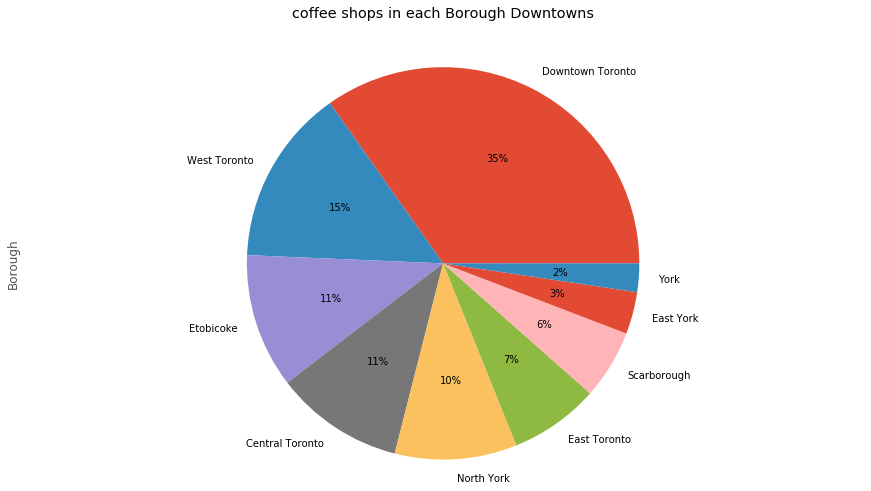

In [72]:
# autopct create %, start angle represent starting point
tv_df['Borough'].value_counts().plot(kind='pie',
                            figsize=(15, 8),
                            autopct='%1.0f%%', # add in percentages
                            startangle=0,     # start angle 90° (Africa)
                            shadow=False,       # add shadow      
                            )

plt.title('coffee shops in each Borough Downtowns', y=1.05)
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

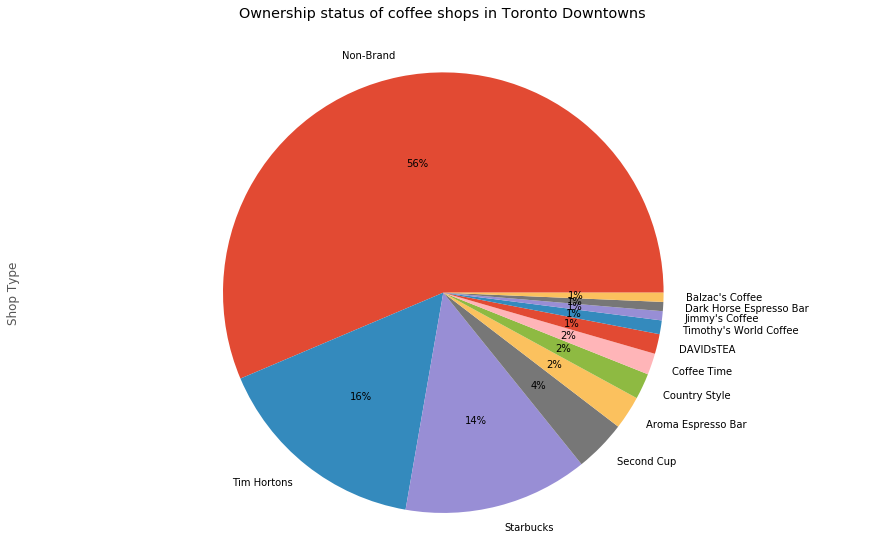

In [73]:
# autopct create %, start angle represent starting point
tv_df['Shop Type'].value_counts().plot(kind='pie',
                            figsize=(15, 9),
                            autopct='%1.0f%%', # add in percentages
                            startangle=0,     # start angle 90° (Africa)
                            shadow=False,       # add shadow      
                            )

plt.title('Ownership status of coffee shops in Toronto Downtowns', y=1.05)
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

#### From the above chart, we can say
1. <b> 56% </b> of coffee shops are non-Branded or Local shops
2. <b> Tim Hortons </b> owns 16% 
3. Startbucks have 14% and Second cup owns around 4 %
3. Rest of 10 % coffee shops are small brands or have 5 to 20 no.of coffee shops in Toronto Area

### Next, Let's find out Which one is more famous

We are going to find the popularity based on user likes and ratings from Foursquare.com

 Due to the Foursqure API limitaion, i have to run this code in multiple days. SO have saved the results into .csv file
 while running second time, i am querying only the remaining venues, until i uptain ratings for all venues in my dataframe

In [29]:
all_ratings=pd.read_csv('all_ratings.csv', index_col=[0])
all_ratings.head()

,Venue ID,Venue Rating,Likes Count
0,5a81ae339deb7d369fa7f146,9.1,35.0
1,537d4d6d498ec171ba22e7fe,8.8,163.0
2,5a6b737b35f98359eed11974,8.4,24.0
3,514627d1e4b0dba1b85e9ba8,8.9,449.0
4,59cd51c71b0ea516e9e7b3aa,8.6,20.0


In [30]:
#Join the Venues and Ratings
comp_df=tv_df.join(all_ratings.set_index('Venue ID'), on='Venue ID', lsuffix='_left', rsuffix='_right')
print('Size of data frame with ratings', comp_df.shape)
temp=comp_df[comp_df['Venue Rating'].isnull()]
print('Size of data frame without ratings', temp.shape)

Size of data frame with ratings (894, 16)
Size of data frame without ratings (1, 16)


In [31]:
def getVenueRatings(names,v_ids):
    
    rating_list=[]
    #dct=dict()
    print('Working....')
    for name, v_id in zip(names, v_ids):
        #print('quering the data for ')
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(v_id, CLIENT_ID, CLIENT_SECRET, VERSION)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]

            # return only relevant information for each nearby venue
            try:
                rating=results['venue']['rating']
            except:
                rating=0
            lc=results['venue']['likes']['count']
            dct={'Venue':name, 'Venue ID':v_id, 'Venue Rating':rating, 'Likes Count':lc}
            #venues_rating = pd.DataFrame([dct])
            rating_list.append(dct)
        except Exception as e:
            print('error',e)
            results = requests.get(url).json()
            print(results)
            break
    print('Done')
    return(rating_list)

In [32]:


venue_ratings=getVenueRatings(names=temp['Venue'], v_ids=temp['Venue ID'])

Working....
Done


In [35]:
v=pd.DataFrame(venue_ratings)
v.drop('Venue', axis=1, inplace=True)
v.head()

,Venue ID,Venue Rating,Likes Count
0,4cd9abea6e8b5941cae664d2,6.8,19


In [40]:
all_ratings=all_ratings.append(v, ignore_index=True)
all_ratings.tail()

,Venue ID,Venue Rating,Likes Count
898,56ab7345498e9db1d378d6a9,6.3,1.0
899,5682bfae498e6f67d4a33dc2,6.2,0.0
900,5b93f001cb3fd2002ceb28fb,0.0,6.0
901,53ffb4ff498e0a4a7c6c65c7,8.6,21.0
902,4cd9abea6e8b5941cae664d2,6.8,19.0


In [43]:
#Join the Venues and Ratings to get newly uptained ratings
comp_df=tv_df.join(all_ratings.set_index('Venue ID'), on='Venue ID', lsuffix='_left', rsuffix='_right')
print(comp_df.shape)


(894, 16)


In [44]:
# Lets confrim we have unique Venues in our data frame
print(len(comp_df['Venue ID'].unique()))
print(len(comp_df))


894
894


In [45]:
# Check if any Venues in our dataframe without Rating
len(comp_df[comp_df['Venue Rating'].isnull()])

0

In [46]:
#Let create a final data fram with only Required fields
final_df=comp_df[['Borough','Neighbourhood','Neighbourhood Latitude','Neighbourhood Longitude','Venue','Shop Type','Distance in Meters','Venue Rating','Likes Count']]

In [47]:
final_df.shape

(894, 9)

In [48]:
final_df['Borough'].value_counts()

Downtown Toronto    311
West Toronto        130
Etobicoke            99
Central Toronto      95
North York           90
East Toronto         66
Scarborough          51
East York            31
York                 21
Name: Borough, dtype: int64

In [49]:
final_df.dtypes

Borough                     object
Neighbourhood               object
Neighbourhood Latitude     float64
Neighbourhood Longitude    float64
Venue                       object
Shop Type                   object
Distance in Meters           int64
Venue Rating               float64
Likes Count                float64
dtype: object

In [50]:
# We have 200 Venues as non-rated. So this significantly impact our analsys
# We have to drop theose venues from our analysis
final_df=final_df.loc[final_df['Venue Rating']>0]

In [51]:
final_df.shape

(694, 9)

In [52]:
final_grouped=final_df.groupby(['Borough','Neighbourhood','Neighbourhood Latitude','Neighbourhood Longitude','Shop Type']).agg({
                                              'Venue':'count',
                                              'Venue Rating':'mean',
                                              'Likes Count':'sum'}).reset_index()

In [53]:
final_grouped.rename(columns={'Venue':'Venue Count'}, inplace=True)

In [54]:
#Lets create a wighted average using likes and Ratings.
#I'm applying 30% for Venue Count 50% to Ratings and 20% of weight to Likes.
final_grouped['w_avg']=(final_grouped['Venue Count']*.3)+(final_grouped['Venue Rating']*.5)+(final_grouped['Likes Count']*.2)
final_grouped.head(10)

,Borough,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Shop Type,Venue Count,Venue Rating,Likes Count,w_avg
0,Central Toronto,Davisville,43.704324,-79.388790,Aroma Espresso Bar,1,7.500,73.0,18.6500
1,Central Toronto,Davisville,43.704324,-79.388790,Non-Brand,5,7.240,184.0,41.9200
2,Central Toronto,Davisville,43.704324,-79.388790,Second Cup,4,5.975,37.0,11.5875
3,Central Toronto,Davisville,43.704324,-79.388790,Starbucks,4,7.525,197.0,44.3625
4,Central Toronto,Davisville,43.704324,-79.388790,Tim Hortons,5,6.020,80.0,20.5100
5,Central Toronto,Davisville,43.704324,-79.388790,Timothy's World Coffee,1,5.600,6.0,4.3000
6,Central Toronto,Davisville North,43.712751,-79.390197,DAVIDsTEA,1,8.800,42.0,13.1000
7,Central Toronto,Davisville North,43.712751,-79.390197,Starbucks,2,7.950,82.0,20.9750
8,Central Toronto,Davisville North,43.712751,-79.390197,Tim Hortons,1,6.800,21.0,7.9000
9,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",43.686412,-79.400049,Aroma Espresso Bar,1,7.300,35.0,10.9500


In [55]:
final_grouped.sort_values(['Borough','Neighbourhood','w_avg'], ascending=[True, True, False], inplace=True)
final_grouped.reset_index(drop=True, inplace=True)
final_grouped.head()

,Borough,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Shop Type,Venue Count,Venue Rating,Likes Count,w_avg
0,Central Toronto,Davisville,43.704324,-79.38879,Starbucks,4,7.525,197.0,44.3625
1,Central Toronto,Davisville,43.704324,-79.38879,Non-Brand,5,7.240,184.0,41.9200
2,Central Toronto,Davisville,43.704324,-79.38879,Tim Hortons,5,6.020,80.0,20.5100
3,Central Toronto,Davisville,43.704324,-79.38879,Aroma Espresso Bar,1,7.500,73.0,18.6500
4,Central Toronto,Davisville,43.704324,-79.38879,Second Cup,4,5.975,37.0,11.5875


In [56]:
#Creating mapping for Shop Type
st=final_grouped['Shop Type'].unique()
st_lst=[]
y=1
for x in st:
    #print(x,y)
    dics={'Shop Type':x, 'Shop Key':y}
    st_lst.append(dics)
    y=y+1
st_df=pd.DataFrame(st_lst)
st_df

,Shop Type,Shop Key
0,Starbucks,1
1,Non-Brand,2
2,Tim Hortons,3
3,Aroma Espresso Bar,4
4,Second Cup,5
5,Timothy's World Coffee,6
6,DAVIDsTEA,7
7,Dark Horse Espresso Bar,8
8,Jimmy's Coffee,9
9,Balzac's Coffee,10


In [57]:
final_grouped=final_grouped.join(st_df.set_index('Shop Type'), on='Shop Type')

In [58]:
final_grouped.head()

,Borough,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Shop Type,Venue Count,Venue Rating,Likes Count,w_avg,Shop Key
0,Central Toronto,Davisville,43.704324,-79.38879,Starbucks,4,7.525,197.0,44.3625,1
1,Central Toronto,Davisville,43.704324,-79.38879,Non-Brand,5,7.240,184.0,41.9200,2
2,Central Toronto,Davisville,43.704324,-79.38879,Tim Hortons,5,6.020,80.0,20.5100,3
3,Central Toronto,Davisville,43.704324,-79.38879,Aroma Espresso Bar,1,7.500,73.0,18.6500,4
4,Central Toronto,Davisville,43.704324,-79.38879,Second Cup,4,5.975,37.0,11.5875,5


In [59]:
final_grouped['Venue Rank']=final_grouped.sort_values(['Borough','Neighbourhood','w_avg'], 
                          ascending=[True,  True, False]).groupby(['Borough','Neighbourhood']).cumcount()+1


In [60]:
final_grouped['Venue Rank'].value_counts()

1    88
2    63
3    43
4    22
5    15
6     9
7     5
Name: Venue Rank, dtype: int64

In [61]:
final_grouped=final_grouped.loc[final_grouped['Venue Rank']==1]

In [62]:
final_grouped.head(10)

,Borough,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Shop Type,Venue Count,Venue Rating,Likes Count,w_avg,Shop Key,Venue Rank
0,Central Toronto,Davisville,43.704324,-79.388790,Starbucks,4,7.525000,197.0,44.362500,1,1
6,Central Toronto,Davisville North,43.712751,-79.390197,Starbucks,2,7.950000,82.0,20.975000,1,1
9,Central Toronto,"Deer Park,Forest Hill SE,Rathnelly,South Hill,...",43.686412,-79.400049,Non-Brand,2,8.400000,162.0,37.200000,2,1
15,Central Toronto,"Forest Hill North,Forest Hill West",43.696948,-79.411307,Non-Brand,2,8.350000,71.0,18.975000,2,1
19,Central Toronto,Lawrence Park,43.728020,-79.388790,Tim Hortons,1,6.000000,1.0,3.500000,3,1
20,Central Toronto,North Toronto West,43.715383,-79.405678,Non-Brand,3,8.200000,142.0,33.400000,2,1
24,Central Toronto,"The Annex,North Midtown,Yorkville",43.672710,-79.405678,Non-Brand,9,7.400000,243.0,55.000000,2,1
27,Downtown Toronto,"Adelaide,King,Richmond",43.650571,-79.384568,Non-Brand,6,8.000000,181.0,42.000000,2,1
32,Downtown Toronto,Berczy Park,43.644771,-79.373306,Starbucks,3,7.166667,34.0,11.283333,1,1
35,Downtown Toronto,"CN Tower,Bathurst Quay,Island airport,Harbourf...",43.628947,-79.394420,Non-Brand,11,7.890909,215.0,50.245455,2,1


In [63]:
final_forkm=final_grouped[['Venue Rank','w_avg']]
final_forkm.head()

,Venue Rank,w_avg
0,1,44.3625
6,1,20.9750
9,1,37.2000
15,1,18.9750
19,1,3.5000


In [64]:
# set number of clusters
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0)
#k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
kmeans.fit(final_forkm)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 0, 3, 0, 0, 3, 3, 3, 0, 3])

In [65]:
# add clustering labels
try:
    final_grouped.insert(0, 'Cluster Labels', kmeans.labels_)
except:
    final_grouped.drop('Cluster Labels', axis=1, inplace=True)
    final_grouped.insert(0, 'Cluster Labels', kmeans.labels_)


In [66]:
final_grouped.groupby(['Cluster Labels'])['Neighbourhood'].count()

Cluster Labels
0    60
1     1
2     7
3    19
4     1
Name: Neighbourhood, dtype: int64

In [67]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_grouped['Neighbourhood Latitude'], final_grouped['Neighbourhood Longitude'], final_grouped['Neighbourhood'], final_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [68]:
final_grouped.loc[final_grouped['Cluster Labels']==4]

,Cluster Labels,Borough,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Shop Type,Venue Count,Venue Rating,Likes Count,w_avg,Shop Key,Venue Rank
44,4,Downtown Toronto,"Chinatown,Grange Park,Kensington Market",43.653206,-79.400049,Non-Brand,31,7.932258,2058.0,424.866129,2,1


In [69]:
result_df=final_grouped.groupby(['Cluster Labels','Shop Type']).agg(
    {'Venue Rating':'mean', 'Venue Count':'sum','Neighbourhood':'count'}).reset_index()

In [70]:
result_df.sort_values(['Cluster Labels','Venue Count','Shop Type'], ascending=[True,False,True])

,Cluster Labels,Shop Type,Venue Rating,Venue Count,Neighbourhood
4,0,Tim Hortons,6.350595,48,28
1,0,Non-Brand,7.126212,47,11
3,0,Starbucks,7.071930,30,19
0,0,Aroma Espresso Bar,8.600000,1,1
2,0,Second Cup,7.000000,1,1
5,1,Non-Brand,7.164865,37,1
6,2,Non-Brand,7.949099,84,7
7,3,Non-Brand,7.686889,123,16
8,3,Starbucks,7.348333,22,3
9,4,Non-Brand,7.932258,31,1


In [71]:
final_grouped.groupby(['Shop Type']).agg(
    {'Venue Rating':'mean', 'Venue Count':'sum','Neighbourhood':'count','Cluster Labels':'nunique'}).reset_index()

,Shop Type,Venue Rating,Venue Count,Neighbourhood,Cluster Labels
0,Aroma Espresso Bar,8.600000,1,1,1
1,Non-Brand,7.558872,322,36,5
2,Second Cup,7.000000,1,1,1
3,Starbucks,7.109621,52,22,2
4,Tim Hortons,6.350595,48,28,1
